## import stuff

In [15]:
#importing things
import pandas as pd
import os
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
import scipy.stats as st
from scipy.linalg import hadamard
from scipy.stats import ttest_ind_from_stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from collections import OrderedDict
import seaborn as sns
import colorsys
from functools import reduce
from scipy.optimize import curve_fit
from operator import itemgetter
import math
import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):  
    # --------------------- SOURCE: @IanHincks ---------------------
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

## import data

In [16]:
kd = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220603_CH65_QCfilt_REPfilt.csv',delimiter=',',dtype={'geno': str}),columns=('geno','MA90_mean','SI06_mean','G189E_mean'))
Frac_bound = pd.DataFrame(pd.read_csv('../../Enrichment_Inference/20220725_fracbound.csv',delimiter=',',dtype={'geno': str}))
all_data = pd.DataFrame()
all_data = pd.merge(kd, Frac_bound, on='geno',how='outer')
all_data.head()

,geno,MA90_mean,SI06_mean,G189E_mean,CH65_i_MI_neg_a,CH65_i_MI_pos_a,CH65_i_MI_neg_b,CH65_i_MI_pos_b,CH65_i_MI_neg_c,CH65_i_MI_pos_c,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut
0,0000000000000000,8.542521,6.0,6.0,697,4,547,4,256,12,...,0,0,0,0,0,0,0,0,0,0
1,0000000000000001,8.574179,6.0,6.0,575,2,438,3,232,13,...,0,0,0,0,0,0,0,0,1,1
2,0000000000000010,8.315518,6.0,6.0,650,7,563,2,374,6,...,0,0,0,0,0,0,0,1,0,1
3,0000000000000011,8.473877,6.0,6.0,742,6,562,18,337,19,...,0,0,0,0,0,0,0,1,1,2
4,0000000000000100,8.537724,6.0,6.0,653,6,507,10,479,14,...,0,0,0,0,0,0,1,0,0,1


# correlation between replicates

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_74121/503405372.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)


0.2686349141844892


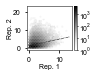

In [17]:
#MI15
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = Frac_bound[['MIa_frac', 'MIb_frac']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['MIa_frac'], plotting['MIb_frac'],cmap='Greys',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 1",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['MIa_frac']
y = plotting['MIb_frac']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([0,0.2])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['MIa_frac'], plotting['MIb_frac'])
m, b = np.polyfit(plotting['MIa_frac'], plotting['MIb_frac'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('images/MI15_rep_corr.png',transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_74121/1062237925.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)


0.1414329146041634


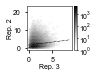

In [18]:
#MI15
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = Frac_bound[['MIc_frac', 'MIb_frac']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['MIc_frac'], plotting['MIb_frac'],cmap='Greys',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 3",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['MIc_frac']
y = plotting['MIb_frac']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([0,0.2])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['MIc_frac'], plotting['MIb_frac'])
m, b = np.polyfit(plotting['MIc_frac'], plotting['MIb_frac'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('images/MI15_rep_corr3.png',transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_74121/2102290485.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)


0.42300233039059676


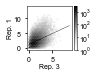

In [19]:
#MI15
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = Frac_bound[['MIc_frac', 'MIa_frac']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['MIc_frac'], plotting['MIa_frac'],cmap='Greys',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 3",fontsize=7,labelpad=1)
plt.ylabel("Rep. 1",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['MIc_frac']
y = plotting['MIa_frac']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([0,0.2])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['MIc_frac'], plotting['MIa_frac'])
m, b = np.polyfit(plotting['MIc_frac'], plotting['MIa_frac'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('images/MI15_rep_corr13.png',transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_74121/3618493677.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)


0.9253499745122157


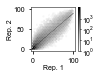

In [20]:
#SI06 G189D
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = Frac_bound[['SIa_frac', 'SIb_frac']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['SIa_frac'], plotting['SIb_frac'],cmap='Greys',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 1",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['SIa_frac']
y = plotting['SIb_frac']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([0,1])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['SIa_frac'], plotting['SIb_frac'])
m, b = np.polyfit(plotting['SIa_frac'], plotting['SIb_frac'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('images/SI06_G189D_rep_corr.png',transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_74121/3912121665.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)


0.9224661864067806


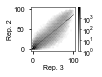

In [21]:
#SI06 G189D
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = Frac_bound[['SIc_frac', 'SIb_frac']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['SIc_frac'], plotting['SIb_frac'],cmap='Greys',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 3",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['SIc_frac']
y = plotting['SIb_frac']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([0,1])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['SIc_frac'], plotting['SIb_frac'])
m, b = np.polyfit(plotting['SIc_frac'], plotting['SIb_frac'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('images/SI06_G189D_rep_corr3.png',transparent=True, dpi=600,bbox_inches='tight')

/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_74121/64408092.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)


0.8881829394092695


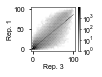

In [22]:
#SI06 G189D
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = Frac_bound[['SIc_frac', 'SIa_frac']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['SIc_frac'], plotting['SIa_frac'],cmap='Greys',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 3",fontsize=7,labelpad=1)
plt.ylabel("Rep. 1",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['SIc_frac']
y = plotting['SIa_frac']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([0,1])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['SIc_frac'], plotting['SIa_frac'])
m, b = np.polyfit(plotting['SIc_frac'], plotting['SIa_frac'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('images/SI06_G189D_rep_corr13.png',transparent=True, dpi=600,bbox_inches='tight')

## general landscape figures

In [23]:
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.colors as mc
import colorsys
from matplotlib.ticker import FixedLocator, FixedFormatter

def lighten_color(color, amount=0.5):  
    # --------------------- SOURCE: @IanHincks ---------------------
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


In [24]:
#get germline, i2, and somatic Kd values
germ_MA90 = float(all_data['MA90_mean'].values[all_data['geno']=='0000000000000000'])
germ_SI06 = float(all_data['SI06_mean'].values[all_data['geno']=='0000000000000000'])
germ_G189E = float(all_data['G189E_mean'].values[all_data['geno']=='0000000000000000'])
I2_MA90 = float(all_data['MA90_mean'].values[all_data['geno']=='0000001010100000'])
I2_SI06 = float(all_data['SI06_mean'].values[all_data['geno']=='0000001010100000'])
I2_G189E = float(all_data['G189E_mean'].values[all_data['geno']=='0000001010100000'])
som_MA90 = float(all_data['MA90_mean'].values[all_data['geno']=='1111111111111111'])
som_SI06 = float(all_data['SI06_mean'].values[all_data['geno']=='1111111111111111'])
som_G189E = float(all_data['G189E_mean'].values[all_data['geno']=='1111111111111111'])

#get germline, i2, and somatic enrichment scores
germ_MI = float(all_data['MI_frac_mean'].values[all_data['geno']=='0000000000000000'])
germ_SI = float(all_data['SI_frac_mean'].values[all_data['geno']=='0000000000000000'])
germ_MI_e = float(all_data['MI_frac_sem'].values[all_data['geno']=='0000000000000000'])
germ_SI_e = float(all_data['SI_frac_sem'].values[all_data['geno']=='0000000000000000'])
I2_MI = float(all_data['MI_frac_mean'].values[all_data['geno']=='0000001010100000'])
I2_SI = float(all_data['SI_frac_mean'].values[all_data['geno']=='0000001010100000'])
I2_MI_e = float(all_data['MI_frac_sem'].values[all_data['geno']=='0000001010100000'])
I2_SI_e = float(all_data['SI_frac_sem'].values[all_data['geno']=='0000001010100000'])
som_MI = float(all_data['MI_frac_mean'].values[all_data['geno']=='1111111111111111'])
som_SI = float(all_data['SI_frac_mean'].values[all_data['geno']=='1111111111111111'])
som_MI_e = float(all_data['MI_frac_sem'].values[all_data['geno']=='1111111111111111'])
som_SI_e = float(all_data['SI_frac_sem'].values[all_data['geno']=='1111111111111111'])
germline = ([germ_MI,germ_MI_e,germ_SI,germ_SI_e])
i2 = ([I2_MI,I2_MI_e,I2_SI,I2_SI_e])
somatic = ([som_MI,som_MI_e,som_SI,som_SI_e])
print(germline)
print(i2)
print(somatic)

[1.1544939430665533, 0.321792378527947, 1.6405793980095131, 1.1963439885862843]
[1.486320428588426, 0.2173659317056867, 7.32488393647155, 2.845671360821477]
[3.11946862840099, 1.319930449549466, 88.88787886583538, 4.51115034174687]


## box plots by number of mutations

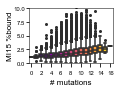

In [26]:
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1.5,1))      
sns.boxplot(x="som_mut", y="MI_frac_mean", data=all_data,palette='plasma', saturation=1,
            flierprops=flierprops, ax=ax)

plt.xlabel("# mutations",fontsize=8)
plt.ylabel("MI15 %bound",fontsize=8,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
# y_locator = FixedLocator([0,0.5,1])
# ax.yaxis.set_major_locator(y_locator)
# ax.set_yticklabels(['0','0.5','1'])
plt.ylim(0,10)
x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1.2)
    artist.set_edgecolor(col) 
    artist.set_edgecolor('black') 
    artist.set_linewidth(0.5)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(1)
plt.savefig('images/20220723_CH65_MI15_box_bymut.png', transparent=True, dpi=1200,bbox_inches='tight')

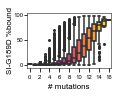

In [27]:
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1.5,1))      
sns.boxplot(x="som_mut", y="SI_frac_mean", data=all_data,palette='plasma', saturation=1,
            flierprops=flierprops, ax=ax)

plt.xlabel("# mutations",fontsize=8)
plt.ylabel("SI-G189D %bound",fontsize=8,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and SInor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
# y_locator = FixedLocator([0,0.5,1])
# ax.yaxis.set_major_locator(y_locator)
# ax.set_yticklabels(['0','0.5','1'])
# plt.ylim(0,1.1)
x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
ax.xaxis.set_major_locator(x_locator)
ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1.2)
    artist.set_edgecolor(col) 
    artist.set_edgecolor('black') 
    artist.set_linewidth(0.5)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(1)
plt.savefig('images/20220723_CH65_SIG189D_box_bymut.png', transparent=True, dpi=1200,bbox_inches='tight')

## Histograms

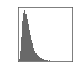

In [28]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['axes.linewidth'] = 0.5
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
x = all_data['MI_frac_mean']
fig = plt.figure(figsize=(0.97,1))
ax = fig.add_subplot()
ax.hist(x,bins=50,color='dimgray')
ax.yaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
x_locator = FixedLocator([0,0.5,1])
ax.xaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
#ax.yaxis.set_major_formatter(formatter)
ax.set_xlim([0, 10])
plt.xlabel(' ',fontsize=8,labelpad=1)
plt.ylabel(' ',fontsize=8,labelpad=1)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(7)
#plt.title('MA90',fontsize=8)
plt.savefig("images/20220723_MI_hist.png", transparent=True, dpi=600,bbox_inches='tight')

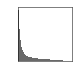

In [29]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['axes.linewidth'] = 0.5
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
x = all_data['SI_frac_mean']
fig = plt.figure(figsize=(0.97,1))
ax = fig.add_subplot()
ax.hist(x,bins=50,color='dimgray')
ax.yaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
x_locator = FixedLocator([0,0.5,1])
ax.xaxis.set_tick_params(labelsize=7,pad=1,length=2.5,width=0)
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
#ax.yaxis.set_major_formatter(formatter)
ax.set_xlim([0, 100])
plt.xlabel(' ',fontsize=8,labelpad=1)
plt.ylabel(' ',fontsize=8,labelpad=1)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(7)
#plt.title('MA90',fontsize=8)
plt.savefig("images/20220723_SI_hist.png", transparent=True, dpi=600,bbox_inches='tight')

## Pleiotropy scatter plots

<Figure size 432x288 with 0 Axes>

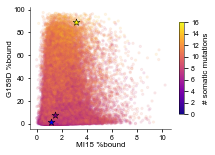

In [30]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = all_data['MI_frac_mean']
y = all_data['SI_frac_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
# x_locator = FixedLocator([8,9,10])
# y_locator = FixedLocator([6,7,8,9])
# ax.set_xticklabels(['8','9','10'])
# ax.set_yticklabels(['≤ 6','7','8','9'])
# ax.xaxis.set_major_locator(x_locator)
# ax.yaxis.set_major_locator(y_locator)
# plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
# plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=all_data['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_MI,germ_SI, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_MI,I2_SI,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_MI,som_SI,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
# ax.set_xlim([7.5, 10.5])
# ax.set_ylim([5.5, 9.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MI15 %bound',fontsize=8,labelpad=1)
plt.ylabel('G189D %bound',fontsize=8,labelpad=0)
plt.title('',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220723_CH65_MI15_SIG189D.png", transparent=True, dpi=600,bbox_inches='tight')

# correlation between MI15 and other antigens

0.36349656081470466


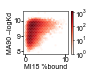

In [31]:
#CH65 MA90 vs MI15
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = all_data[['MI_frac_mean', 'MA90_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['MI_frac_mean'], plotting['MA90_mean'],cmap='Reds',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("MI15 %bound",fontsize=7,labelpad=1)
plt.ylabel("MA90 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['MI_frac_mean']
y = plotting['MA90_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['MI_frac_mean'], plotting['MA90_mean'])
print(corr)
plt.savefig('images/CH65_MI_vs_MA90.png',transparent=True, dpi=600,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

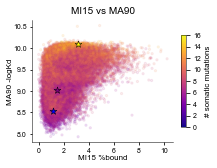

In [32]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = all_data['MI_frac_mean']
y = all_data['MA90_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
# x_locator = FixedLocator([8,9,10])
# y_locator = FixedLocator([6,7,8,9])
# ax.set_xticklabels(['8','9','10'])
# ax.set_yticklabels(['≤ 6','7','8','9'])
# ax.xaxis.set_major_locator(x_locator)
# ax.yaxis.set_major_locator(y_locator)
# plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
# plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=all_data['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_MI,germ_MA90, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_MI,I2_MA90,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_MI,som_MA90,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
# ax.set_xlim([7.5, 10.5])
# ax.set_ylim([5.5, 9.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MI15 %bound',fontsize=8,labelpad=1)
plt.ylabel('MA90 -logKd',fontsize=8,labelpad=0)
plt.title('MI15 vs MA90',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220723_CH65_MI15_MA90.png", transparent=True, dpi=600,bbox_inches='tight')

0.1414294991496345


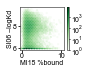

In [33]:
#CH65 SI06 vs MI15
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = all_data[['MI_frac_mean', 'SI06_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['MI_frac_mean'], plotting['SI06_mean'],cmap='Greens',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("MI15 %bound",fontsize=7,labelpad=1)
plt.ylabel("SI06 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['MI_frac_mean']
y = plotting['SI06_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['MI_frac_mean'], plotting['SI06_mean'])
print(corr)
plt.savefig('images/CH65_MI_vs_SI06.png',transparent=True, dpi=600,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

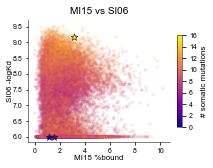

In [34]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = all_data['MI_frac_mean']
y = all_data['SI06_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
# x_locator = FixedLocator([8,9,10])
# y_locator = FixedLocator([6,7,8,9])
# ax.set_xticklabels(['8','9','10'])
# ax.set_yticklabels(['≤ 6','7','8','9'])
# ax.xaxis.set_major_locator(x_locator)
# ax.yaxis.set_major_locator(y_locator)
# plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
# plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=all_data['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_MI,germ_SI06, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_MI,I2_SI06,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_MI,som_SI06,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
# ax.set_xlim([7.5, 10.5])
# ax.set_ylim([5.5, 9.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MI15 %bound',fontsize=8,labelpad=1)
plt.ylabel('SI06 -logKd',fontsize=8,labelpad=0)
plt.title('MI15 vs SI06',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220723_CH65_MI15_SI06.png", transparent=True, dpi=600,bbox_inches='tight')

0.26333851146964105


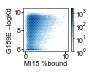

In [35]:
#CH65 G189E vs MI15
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = all_data[['MI_frac_mean', 'G189E_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['MI_frac_mean'], plotting['G189E_mean'],cmap='Blues',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("MI15 %bound",fontsize=7,labelpad=1)
plt.ylabel("G189E –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['MI_frac_mean']
y = plotting['G189E_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['MI_frac_mean'], plotting['G189E_mean'])
print(corr)
plt.savefig('images/CH65_MI_vs_G189E.png',transparent=True, dpi=600,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

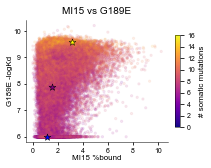

In [36]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = all_data['MI_frac_mean']
y = all_data['G189E_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
# x_locator = FixedLocator([8,9,10])
# y_locator = FixedLocator([6,7,8,9])
# ax.set_xticklabels(['8','9','10'])
# ax.set_yticklabels(['≤ 6','7','8','9'])

# plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
# plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=all_data['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_MI,germ_G189E, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_MI,I2_G189E,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_MI,som_G189E,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
# ax.set_xlim([7.5, 10.5])
# ax.set_ylim([5.5, 9.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('MI15 %bound',fontsize=8,labelpad=1)
plt.ylabel('G189E -logKd',fontsize=8,labelpad=0)
plt.title('MI15 vs G189E',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220723_CH65_MI15_G189E.png", transparent=True, dpi=600,bbox_inches='tight')

# correlation between SI15 and other antigens

0.6748275154065002


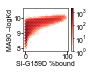

In [37]:
#CH65 MA90 vs SI15
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = all_data[['SI_frac_mean', 'MA90_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['SI_frac_mean'], plotting['MA90_mean'],cmap='Reds',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("SI-G189D %bound",fontsize=7,labelpad=1)
plt.ylabel("MA90 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['SI_frac_mean']
y = plotting['MA90_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['SI_frac_mean'], plotting['MA90_mean'])
print(corr)
plt.savefig('images/CH65_SI_vs_MA90.png',transparent=True, dpi=600,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

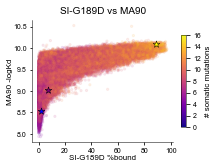

In [38]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = all_data['SI_frac_mean']
y = all_data['MA90_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
# x_locator = FixedLocator([8,9,10])
# y_locator = FixedLocator([6,7,8,9])
# ax.set_xticklabels(['8','9','10'])
# ax.set_yticklabels(['≤ 6','7','8','9'])
# ax.xaxis.set_major_locator(x_locator)
# ax.yaxis.set_major_locator(y_locator)
# plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
# plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=all_data['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_SI,germ_MA90, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_SI,I2_MA90,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_SI,som_MA90,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
# ax.set_xlim([7.5, 10.5])
# ax.set_ylim([5.5, 9.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('SI-G189D %bound',fontsize=8,labelpad=1)
plt.ylabel('MA90 -logKd',fontsize=8,labelpad=0)
plt.title('SI-G189D vs MA90',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220723_CH65_SI15_MA90.png", transparent=True, dpi=600,bbox_inches='tight')

0.8707629060800722


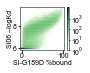

In [39]:
#CH65 SI06 vs SI15
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = all_data[['SI_frac_mean', 'SI06_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['SI_frac_mean'], plotting['SI06_mean'],cmap='Greens',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("SI-G189D %bound",fontsize=7,labelpad=1)
plt.ylabel("SI06 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['SI_frac_mean']
y = plotting['SI06_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['SI_frac_mean'], plotting['SI06_mean'])
print(corr)
plt.savefig('images/CH65_SI_vs_SI06.png',transparent=True, dpi=600,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

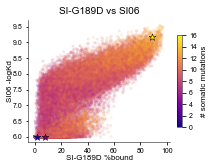

In [40]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = all_data['SI_frac_mean']
y = all_data['SI06_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
# x_locator = FixedLocator([8,9,10])
# y_locator = FixedLocator([6,7,8,9])
# ax.set_xticklabels(['8','9','10'])
# ax.set_yticklabels(['≤ 6','7','8','9'])
# ax.xaxis.set_major_locator(x_locator)
# ax.yaxis.set_major_locator(y_locator)
# plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
# plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=all_data['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_SI,germ_SI06, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_SI,I2_SI06,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_SI,som_SI06,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
# ax.set_xlim([7.5, 10.5])
# ax.set_ylim([5.5, 9.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('SI-G189D %bound',fontsize=8,labelpad=1)
plt.ylabel('SI06 -logKd',fontsize=8,labelpad=0)
plt.title('SI-G189D vs SI06',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220723_CH65_SI15_SI06.png", transparent=True, dpi=600,bbox_inches='tight')

0.6722195194727784


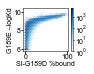

In [41]:
#CH65 G189E vs SI15
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = all_data[['SI_frac_mean', 'G189E_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['SI_frac_mean'], plotting['G189E_mean'],cmap='Blues',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("SI-G189D %bound",fontsize=7,labelpad=1)
plt.ylabel("G189E –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['SI_frac_mean']
y = plotting['G189E_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['SI_frac_mean'], plotting['G189E_mean'])
print(corr)
plt.savefig('images/CH65_SI_vs_G189E.png',transparent=True, dpi=600,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

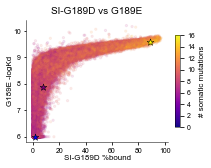

In [42]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
cmap=plt.cm.plasma
plt.clf()
# plot
x = all_data['SI_frac_mean']
y = all_data['G189E_mean']
plt.rcParams['grid.color'] = "white"
fig = plt.figure(figsize=(2.75,2.25))
ax = fig.add_subplot()
# x_locator = FixedLocator([8,9,10])
# y_locator = FixedLocator([6,7,8,9])
# ax.set_xticklabels(['8','9','10'])
# ax.set_yticklabels(['≤ 6','7','8','9'])
# ax.xaxis.set_major_locator(x_locator)
# ax.yaxis.set_major_locator(y_locator)
# plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='black')
# plt.axhline(y=6,linestyle='dashed',linewidth=0.5,color='black')
ax.scatter(x,y, c=all_data['som_mut'], cmap=cmap, s=5, alpha = 0.1, zorder=-10000)
germ=ax.scatter(germ_SI,germ_G189E, s=50,c='blue', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=99999999)
I2=ax.scatter(I2_SI,I2_G189E,s=50,c='purple', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
som=ax.scatter(som_SI,som_G189E,s=50,c='yellow', marker='*',edgecolor='black',linewidths=0.5,alpha=1,zorder=999999)
ax.yaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
ax.xaxis.set_tick_params(labelsize=7,pad=3,length=2.5)
# ax.set_xlim([7.5, 10.5])
# ax.set_ylim([5.5, 9.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('SI-G189D %bound',fontsize=8,labelpad=1)
plt.ylabel('G189E -logKd',fontsize=8,labelpad=0)
plt.title('SI-G189D vs G189E',fontsize=10)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = 0, vmax=16))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.03, pad=0.05,orientation='vertical',aspect=20,ticks=[0,2,4,6,8,10,12,14,16])
cbar.set_label(label='# somatic mutations',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig("images/20220723_CH65_SI15_G189E.png", transparent=True, dpi=600,bbox_inches='tight')

# change in enrichment plots -- MI15

In [43]:
import matplotlib
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

In [44]:
#read in data
dfrac = pd.DataFrame(pd.read_csv('../../Enrichment_Inference/20220725_CH65_dfrac_MI.csv',dtype={'source':'str', 'target':'str'}))
dfrac

,Mutation,dfrac,Number of mutations,dfrac_sem,source,target,pos1,pos2,pos3,pos4,...,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16
0,N26D,-0.893647,0,0.331148,0000000000000000,1000000000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N26D,0.239891,1,0.767410,0000000000000001,1000000000000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,N26D,-0.022250,1,0.557066,0000000000000010,1000000000000010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,N26D,-0.899670,2,0.552329,0000000000000011,1000000000000011,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,N26D,-0.477311,1,0.418194,0000000000000100,1000000000000100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524283,R87K,1.790543,14,1.050298,1111111111110110,1111111111110111,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
524284,R87K,1.701475,13,1.339511,1111111111111000,1111111111111001,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
524285,R87K,1.329692,14,1.512926,1111111111111010,1111111111111011,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
524286,R87K,0.212675,14,0.949580,1111111111111100,1111111111111101,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


## change in enrichment by mutation position

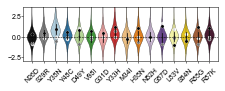

In [45]:
#enrichment
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="dfrac", data=dfrac,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="dfrac", data=dfrac[(dfrac['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="dfrac", data=dfrac[(dfrac['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="dfrac", data=dfrac[(dfrac['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dfrac_MI15.png',transparent=True, dpi=600,bbox_inches='tight')


# change in enrichment by number of mutations

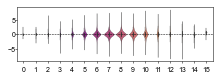

In [46]:
##enrichment
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="dfrac", data=dfrac,scale='count',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dfrac_MI15_num.png',transparent=True, dpi=600,bbox_inches='tight')


## do some statistics

In [47]:
#do a two-sided t-test to see if mean is different from zero
dFrac_mean = []
dFrac_sem = []
#Exp
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dfrac['dfrac'][dfrac['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    dFrac_mean.append(mean)
    dFrac_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(dFrac_mean)
print(dFrac_sem)

N26D -25.27180216301211 1.4221146661890249e-139 32768 1 ***
S29R 45.998430540045106 0.0 32768 1 ***
Y35N 161.30065604167737 0.0 32768 1 ***
Y48C 40.776495669762554 0.0 32768 1 ***
D49Y 21.98688861388781 2.263897350297177e-106 32768 1 ***
V98I -13.03828115955834 9.255885574427466e-39 32768 1 ***
G31D -21.49428217499186 8.901662831712434e-102 32768 1 ***
Y33H 76.22668411831589 0.0 32768 1 ***
M34I -37.949739060122695 1.8955321847941506e-308 32768 1 ***
H35N 16.413744654258963 2.656092890020252e-60 32768 1 ***
N52H 11.25674563268382 2.4288523424587284e-29 32768 1 ***
G57D -12.13897968019991 7.760122301158569e-34 32768 1 ***
L83V 9.882347560900728 5.347528781831296e-23 32768 1 ***
S84N 5.72161238873308 1.064360430462169e-08 32768 1 ***
R85G -5.301709937778416 1.1546505938952782e-07 32768 1 ***
R87K 43.496094315226586 0.0 32768 1 ***
[-0.13354633227311508, 0.2500943694881154, 0.9507081308185118, 0.2172449981576922, 0.11978544695063181, -0.0694482524749108, -0.13485927323292232, 0.5074162883

# change in enrichment plots -- SI-G189D

In [48]:
import matplotlib
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

In [50]:
#read in data
dfracSI = pd.DataFrame(pd.read_csv('../../Enrichment_Inference/20220725_CH65_dfrac_SI.csv',dtype={'source':'str', 'target':'str'}))
dfracSI

,Mutation,dfrac,Number of mutations,dfrac_sem,source,target,pos1,pos2,pos3,pos4,...,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16
0,N26D,-0.062783,0,1.576161,0000000000000000,1000000000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N26D,-0.661434,1,0.345522,0000000000000001,1000000000000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,N26D,-0.354391,1,0.354391,0000000000000010,1000000000000010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,N26D,0.946899,2,1.294469,0000000000000011,1000000000000011,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,N26D,-0.325559,1,1.753752,0000000000000100,1000000000000100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524283,R87K,15.827861,14,1.610019,1111111111110110,1111111111110111,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
524284,R87K,4.537891,13,4.717360,1111111111111000,1111111111111001,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
524285,R87K,21.287489,14,2.372904,1111111111111010,1111111111111011,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
524286,R87K,5.981373,14,4.800557,1111111111111100,1111111111111101,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


## change in enrichment by mutation position

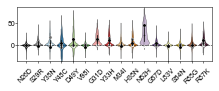

In [51]:
#enrichment
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="dfrac", data=dfracSI,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="dfrac", data=dfracSI[(dfracSI['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="dfrac", data=dfracSI[(dfracSI['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="dfrac", data=dfracSI[(dfracSI['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dfrac_SI_G189D.png',transparent=True, dpi=600,bbox_inches='tight')


## change in enrichment by number of mutations -- SI-G189D

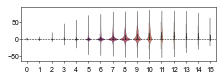

In [52]:
##enrichment
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="dfrac", data=dfracSI,scale='count',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dfrac_SIG189D_num.png',transparent=True, dpi=600,bbox_inches='tight')


## do some statistics

In [53]:
#do a two-sided t-test to see if mean is different from zero
dFracSI_mean = []
dFracSI_sem = []
#Exp
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dfracSI['dfrac'][dfracSI['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    dFracSI_mean.append(mean)
    dFracSI_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(dFracSI_mean)
print(dFracSI_sem)

N26D -25.592741818370214 4.692327339982724e-143 32768 1 ***
S29R 133.0602804908117 0.0 32768 1 ***
Y35N 106.0358782118406 0.0 32768 1 ***
Y48C 14.365274029869578 1.1848931041924979e-46 32768 1 ***
D49Y 75.63398642602543 0.0 32768 1 ***
V98I -21.183560398946575 6.248655734601153e-99 32768 1 ***
G31D 204.1533101969345 0.0 32768 1 ***
Y33H 148.38966072344633 0.0 32768 1 ***
M34I 92.97257105699946 0.0 32768 1 ***
H35N 125.92652346184377 0.0 32768 1 ***
N52H 241.31255629052785 0.0 32768 1 ***
G57D 98.42230749160137 0.0 32768 1 ***
L83V -12.8081646467557 1.8155059995246948e-37 32768 1 ***
S84N 10.502117721915452 9.281422376136758e-26 32768 1 ***
R85G 71.14119353533299 0.0 32768 1 ***
R87K 152.95491208877837 0.0 32768 1 ***
[-0.6816491749794507, 4.717645996831184, 6.506681062037148, 1.3701605442818843, 7.786291534859937, -0.5398231898714729, 13.539663495549682, 9.88578262435525, 3.771957444893401, 7.104271916597667, 26.163970970786533, 3.345029286680242, -0.34663862449930516, 0.28020865252206

## CH65: correlation between mean change in enrichment and mean change in binding for each site

In [54]:
#read in data for change in Kd
toplot = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/dKd_summary.csv'),index=None)
toplot['dFrac_MI_mean'] = dFrac_mean
toplot['dFrac_MI_sem'] = dFrac_sem
toplot['dFrac_SI_mean'] = dFracSI_mean
toplot['dFrac_SI_sem'] = dFracSI_sem
toplot['sum']=abs(toplot['MA90_dKd_mean'])+abs(toplot['SI06_dKd_mean'])+abs(toplot['G189E_dKd_mean'])
toplot['total_err']=((toplot['MA90_dKd_sem'])**2+(toplot['SI06_dKd_sem'])**2+(toplot['G189E_dKd_sem'])**2)**(1/2)
toplot


,Unnamed: 0,mutation_names,MA90_dKd_mean,MA90_dKd_sem,SI06_dKd_mean,SI06_dKd_sem,G189E_dKd_mean,G189E_dKd_sem,dFrac_MI_mean,dFrac_MI_sem,dFrac_SI_mean,dFrac_SI_sem,sum,total_err
0,0,N26D,-0.005894,0.000337,0.125206,0.001299,-0.023788,0.001398,-0.133546,0.005284,-0.681649,0.026634,0.154888,0.001938
1,1,S29R,0.051353,0.000379,0.142751,0.001495,0.282864,0.002014,0.250094,0.005437,4.717646,0.035455,0.476967,0.002537
2,2,Y35N,0.475922,0.001182,0.350730,0.003493,0.948471,0.004559,0.950708,0.005894,6.506681,0.061363,1.775124,0.005864
3,3,Y48C,-0.009082,0.001902,0.045927,0.003476,-0.019971,0.004269,0.217245,0.005328,1.370161,0.095380,0.074980,0.005825
4,4,D49Y,0.245354,0.001940,0.423951,0.004313,0.608515,0.004755,0.119785,0.005448,7.786292,0.102947,1.277820,0.006706
5,5,V98I,0.013609,0.000327,0.041254,0.000740,-0.017201,0.001353,-0.069448,0.005326,-0.539823,0.025483,0.072064,0.001577
6,6,G31D,0.150576,0.000671,0.160146,0.001502,0.556176,0.002757,-0.134859,0.006274,13.539663,0.066321,0.866897,0.003210
7,7,Y33H,0.245317,0.000842,0.262465,0.002520,0.381849,0.002535,0.507416,0.006657,9.885783,0.066620,0.889631,0.003672
8,8,M34I,0.016195,0.000453,0.114124,0.001381,0.109564,0.001620,-0.245291,0.006464,3.771957,0.040571,0.239883,0.002176
9,9,H35N,0.164149,0.000766,0.328146,0.003042,0.347584,0.003106,0.106503,0.006489,7.104272,0.056416,0.839879,0.004415


## correlation between sum of delta(-logKd) and delta(mean enrichment)

## MI15

0.69181218756975


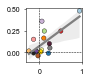

In [55]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dFrac_MI_mean'], toplot['MA90_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dFrac_MI_mean'], toplot['MA90_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='dFrac_MI_mean', y='MA90_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dFrac_MI_sem'],xerr=toplot['MA90_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)

sns.regplot(x='dFrac_MI_mean', y='MA90_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
#plt.xlim(-0.03,0.03)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,0.5],labels=['0','0.5'],fontsize=7)
plt.savefig('images/CH65_dfrac_MI_kd_corr_MA90.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.16322387181361214


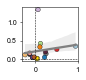

In [56]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dFrac_MI_mean'], toplot['SI06_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dFrac_MI_mean'], toplot['SI06_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='dFrac_MI_mean', y='SI06_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dFrac_MI_sem'],xerr=toplot['SI06_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dFrac_MI_mean', y='SI06_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
#plt.xlim(-0.03,0.03)
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,0.5,1],labels=['0','0.5','1'],fontsize=7)
plt.savefig('images/CH65_dfrac_MI_kd_corr_SI06.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.4570138301992681


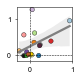

In [57]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dFrac_MI_mean'], toplot['G189E_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dFrac_MI_mean'], toplot['G189E_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='dFrac_MI_mean', y='G189E_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dFrac_MI_sem'],xerr=toplot['G189E_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dFrac_MI_mean', y='G189E_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
#plt.xlim(-0.03,0.03)
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,0.5,1],labels=['0','0.5','1'],fontsize=7)
plt.savefig('images/CH65_dfrac_MI_kd_corr_G189E.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

## SI06-G189D

0.6779268659878861


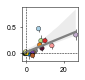

In [58]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dFrac_SI_mean'], toplot['MA90_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dFrac_SI_mean'], toplot['MA90_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='dFrac_SI_mean', y='MA90_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dFrac_SI_sem'],xerr=toplot['MA90_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dFrac_SI_mean', y='MA90_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
#plt.xlim(-0.03,0.03)
#plt.ylim(-0.1,0.25)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,0.25],labels=['0','0.25'],fontsize=7)
plt.savefig('images/CH65_dfrac_SI_kd_corr_MA90.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.8873383136260887


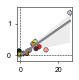

In [59]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dFrac_SI_mean'], toplot['SI06_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dFrac_SI_mean'], toplot['SI06_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='dFrac_SI_mean', y='SI06_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dFrac_SI_sem'],xerr=toplot['SI06_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dFrac_SI_mean', y='SI06_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.03,0.03)
# plt.ylim(-0.1,0.25)
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,0.25],labels=['0','0.25'],fontsize=7)
plt.savefig('images/CH65_dfrac_SI_kd_corr_SI06.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.8666314528384531


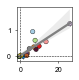

In [60]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dFrac_SI_mean'], toplot['G189E_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dFrac_SI_mean'], toplot['G189E_dKd_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='dFrac_SI_mean', y='G189E_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dFrac_SI_sem'],xerr=toplot['G189E_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dFrac_SI_mean', y='G189E_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.03,0.03)
# plt.ylim(-0.1,0.25)
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,0.25],labels=['0','0.25'],fontsize=7)
plt.savefig('images/CH65_dfrac_SI_kd_corr_G189E.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

## correlation in change in enrichment between SI-G189D and MI15

0.13738601179250104


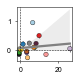

In [61]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dFrac_SI_mean'], toplot['dFrac_MI_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dFrac_SI_mean'], toplot['dFrac_MI_mean'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='dFrac_SI_mean', y='dFrac_MI_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dFrac_SI_sem'],xerr=toplot['dFrac_MI_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dFrac_SI_mean', y='dFrac_MI_mean',data=toplot, scatter=False, ax=ax,color='gray')
#plt.xlim(-0.03,0.03)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,0.5],labels=['0','0.5'],fontsize=7)
plt.savefig('images/CH65_dfrac_SIG189D_MI_kd_corr.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)